In [66]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [80]:
data = []
for root, dirs, files in os.walk('./KMT-2019-BLG-0371/'):
    for f in files:
        if 'V' not in f:
            data.append(np.loadtxt(f'./KMT-2019-BLG-0371/{f}'))
data = np.vstack(data)

In [81]:
data = data[np.argsort(data[:, 0])]

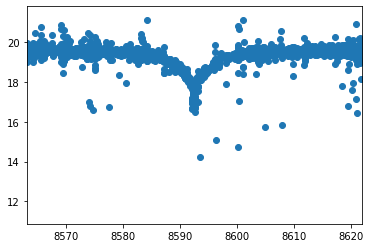

In [82]:
t0 = 8592.52668; te = 14.65
plt.xlim(t0-2*te, t0+2*te)
plt.scatter(data[:, 0], data[:, 3])

In [83]:
a = data[(data[:, 0] > t0-2*te) * (data[:, 0] < t0+2*te)]

In [84]:
a.shape

(2596, 8)

In [85]:
a[:, 0] = (a[:, 0] - t0)/(4*te)

In [86]:
a = np.delete(a, np.where(a[:, 5]>7), axis=0)
a = np.delete(a, np.where(a[:, 5]<0), axis=0)
a = np.delete(a, np.where(a[:, 6]<1000), axis=0)
a = np.delete(a, np.where(a[:, 4]>a[:, 3]/100), axis=0)
a = np.delete(a, 232, axis=0)
a = np.delete(a, 730, axis=0)

In [87]:
a.shape

(839, 8)

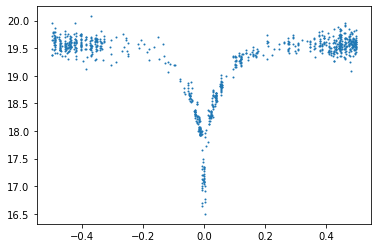

In [88]:
plt.scatter(a[:, 0], a[:, 3], s=1)

385

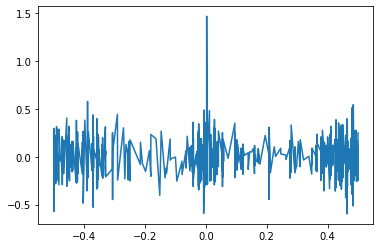

In [90]:
plt.plot(a[:-1, 0], np.diff(a[:, 3]))
np.diff(a[:, 3]).argmax()

In [91]:
a[232]

array([-2.90571502e-01, -8.47665900e+02,  2.21828900e+02,  1.92531000e+01,
        7.92000000e-02,  4.98000000e+00,  1.00400000e+03,  1.54000000e+00])

In [92]:
np.save('./0371.npy', a[:, [0, 3]])

In [14]:
np.where(a[:, 3]<16)

(array([1188, 1290, 1369, 1666, 1779]),)

In [15]:
a = np.delete(a, np.where(a[:, 3]<16), axis=0)

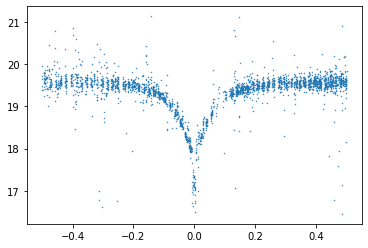

In [16]:
plt.scatter(a[:, 0], a[:, 3], s=0.2)

In [35]:
np.save('./0414.npy', a[:, [0, 3]])